In [81]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv('Data\crop_recommendation.csv')

In [83]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [84]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [85]:
df.size

17600

In [86]:
df.shape

(2200, 8)

In [87]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [88]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [89]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [90]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### Seperating features and target label

In [91]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [92]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [93]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

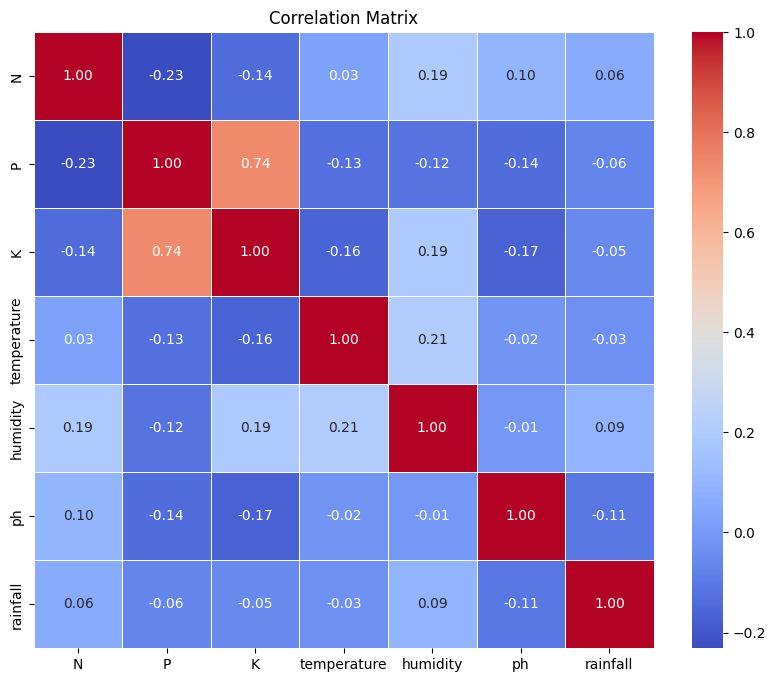

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing your data
# You can use df.select_dtypes to select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [98]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [99]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [101]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Naive Bayes model

In [102]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [104]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

### Saving trained Logistic Regression model

In [105]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'models/SVMClassifier.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [107]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [108]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

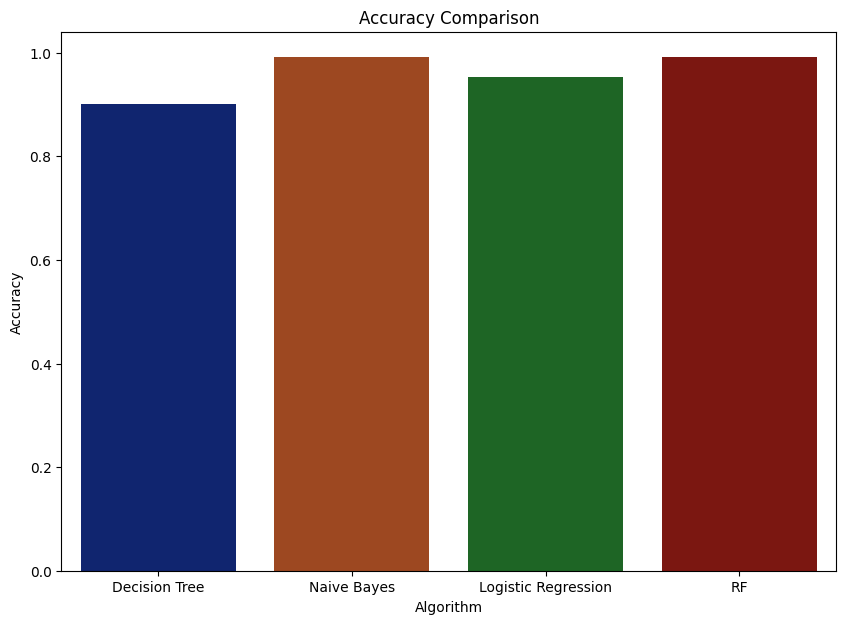

In [109]:
plt.figure(figsize=[10, 7], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x=model, y=acc, ci='sd', palette='dark')
plt.xticks()
plt.show()


In [110]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091


## Making a prediction

In [111]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [112]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [113]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target variable Ytest
Ytest_encoded = label_encoder.fit_transform(Ytest)

# Now let's check the unique labels in Ytest_encoded
unique_labels_encoded = set(Ytest_encoded)
print("Unique labels in Ytest_encoded:", unique_labels_encoded)

Unique labels in Ytest_encoded: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}


In [117]:
from sklearn.metrics import confusion_matrix, classification_report

# Function to calculate and return evaluation metrics
def evaluate_model(model_name, y_true, y_pred):
    # Classification report
    report = classification_report(y_true, y_pred, output_dict=True)
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]  # Extract confusion matrix values
    
    # Extract precision, recall, f1-score, and support
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    support = report['macro avg']['support']
    
    return precision, recall, f1_score, support, TP, TN, FP, FN

# Evaluate Decision Tree
precision, recall, f1_score, support, TP, TN, FP, FN = evaluate_model("Decision Tree", Ytest, DecisionTree.predict(Xtest))
print("Decision Tree - Precision:", precision)
print("Decision Tree - Recall:", recall)
print("Decision Tree - F1 Score:", f1_score)
print("Decision Tree - Support:", support)
print("Decision Tree - True Positives (TP):", TP)
print("Decision Tree - True Negatives (TN):", TN)
print("Decision Tree - False Positives (FP):", FP)
print("Decision Tree - False Negatives (FN):", FN)

# Evaluate Naive Bayes
precision, recall, f1_score, support, TP, TN, FP, FN = evaluate_model("Naive Bayes", Ytest, NaiveBayes.predict(Xtest))
print("Naive Bayes - Precision:", precision)
print("Naive Bayes - Recall:", recall)
print("Naive Bayes - F1 Score:", f1_score)
print("Naive Bayes - Support:", support)
print("Naive Bayes - True Positives (TP):", TP)
print("Naive Bayes - True Negatives (TN):", TN)
print("Naive Bayes - False Positives (FP):", FP)
print("Naive Bayes - False Negatives (FN):", FN)

# Evaluate Logistic Regression
precision, recall, f1_score, support, TP, TN, FP, FN = evaluate_model("Logistic Regression", Ytest, LogReg.predict(Xtest))
print("Logistic Regression - Precision:", precision)
print("Logistic Regression - Recall:", recall)
print("Logistic Regression - F1 Score:", f1_score)
print("Logistic Regression - Support:", support)
print("Logistic Regression - True Positives (TP):", TP)
print("Logistic Regression - True Negatives (TN):", TN)
print("Logistic Regression - False Positives (FP):", FP)
print("Logistic Regression - False Negatives (FN):", FN)

# Evaluate Random Forest
precision, recall, f1_score, support, TP, TN, FP, FN = evaluate_model("Random Forest", Ytest, RF.predict(Xtest))
print("Random Forest - Precision:", precision)
print("Random Forest - Recall:", recall)
print("Random Forest - F1 Score:", f1_score)
print("Random Forest - Support:", support)
print("Random Forest - True Positives (TP):", TP)
print("Random Forest - True Negatives (TN):", TN)
print("Random Forest - False Positives (FP):", FP)
print("Random Forest - False Negatives (FN):", FN)


Decision Tree - Precision: 0.8429842480508324
Decision Tree - Recall: 0.8816216678058784
Decision Tree - F1 Score: 0.8536645363926616
Decision Tree - Support: 440.0
Decision Tree - True Positives (TP): 17
Decision Tree - True Negatives (TN): 13
Decision Tree - False Positives (FP): 0
Decision Tree - False Negatives (FN): 0
Naive Bayes - Precision: 0.9943181818181818
Naive Bayes - Recall: 0.9886363636363636
Naive Bayes - F1 Score: 0.9904761904761905
Naive Bayes - Support: 440.0
Naive Bayes - True Positives (TP): 17
Naive Bayes - True Negatives (TN): 13
Naive Bayes - False Positives (FP): 0
Naive Bayes - False Negatives (FN): 0
Logistic Regression - Precision: 0.9540378567543254
Logistic Regression - Recall: 0.9486827865117339
Logistic Regression - F1 Score: 0.9504447004043698
Logistic Regression - Support: 440.0
Logistic Regression - True Positives (TP): 17
Logistic Regression - True Negatives (TN): 13
Logistic Regression - False Positives (FP): 0
Logistic Regression - False Negatives (

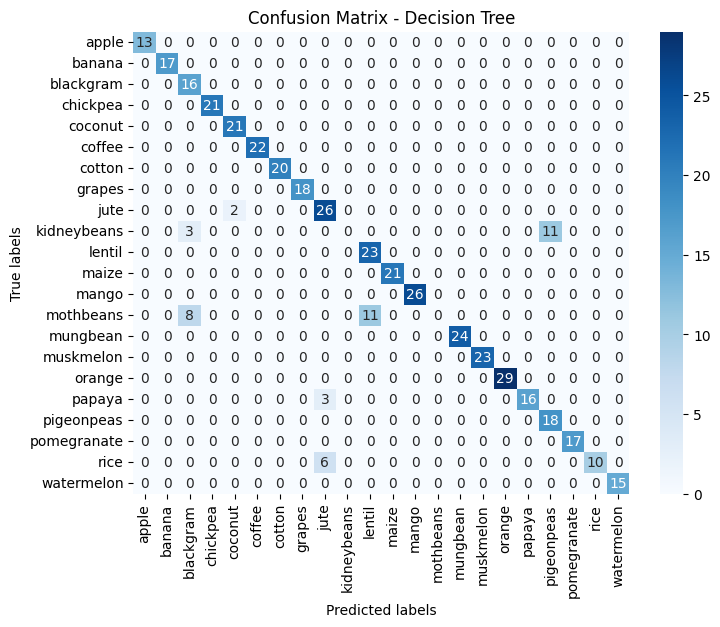

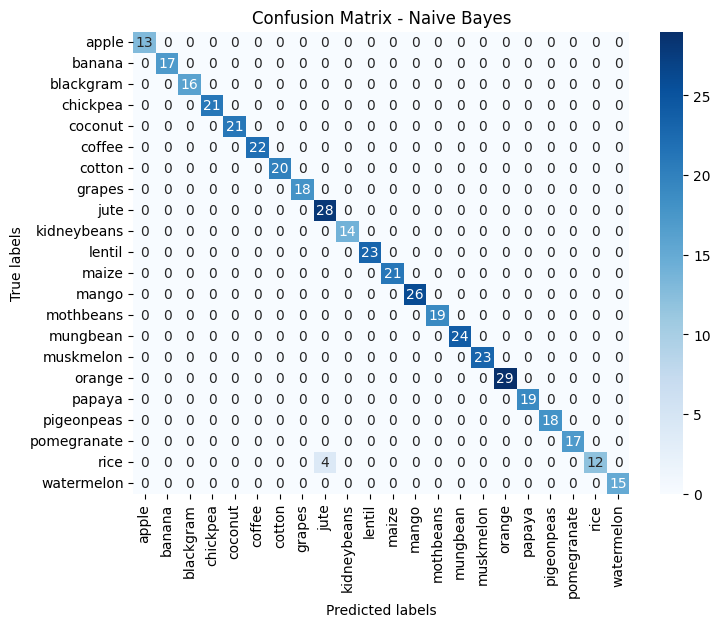

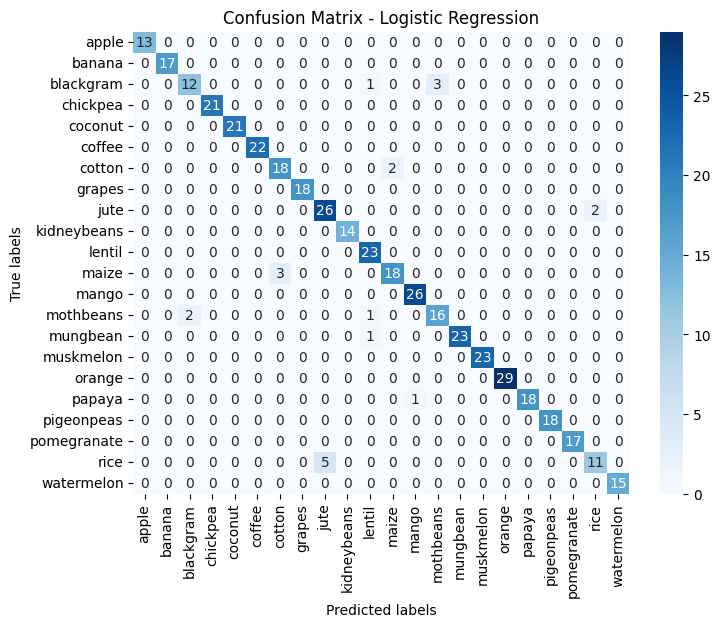

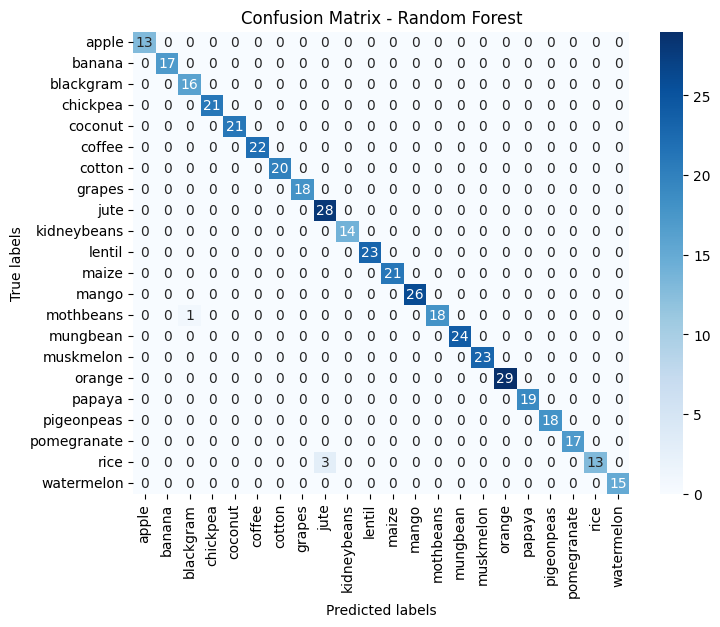

In [118]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Define labels for the confusion matrix
    labels = np.unique(y_true)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Plot confusion matrix for Decision Tree
plot_confusion_matrix("Decision Tree", Ytest, DecisionTree.predict(Xtest))

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix("Naive Bayes", Ytest, NaiveBayes.predict(Xtest))

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix("Logistic Regression", Ytest, LogReg.predict(Xtest))

# Plot confusion matrix for Random Forest
plot_confusion_matrix("Random Forest", Ytest, RF.predict(Xtest))


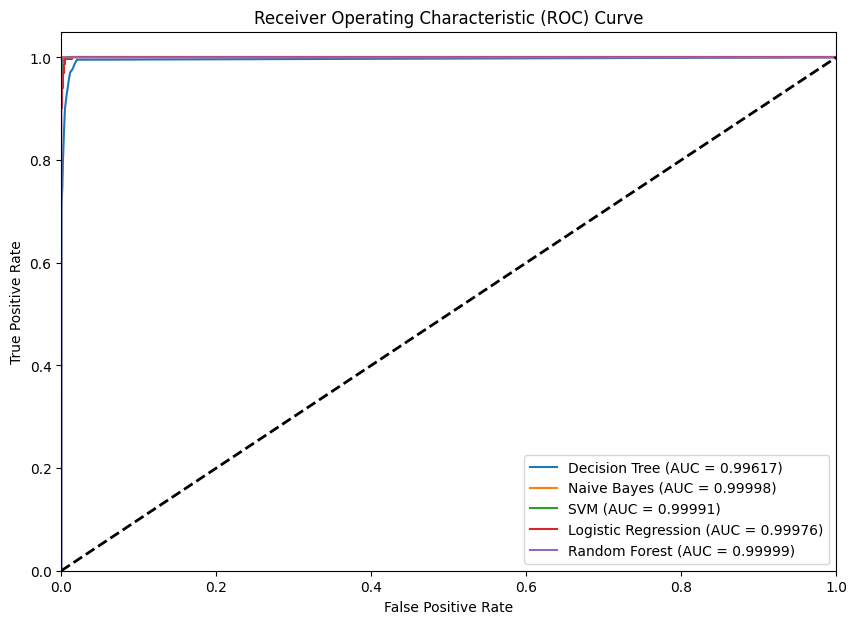

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Assuming Xtrain, Xtest, Ytrain, Ytest are already defined

# Define your models
models = {
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='poly', degree=3, C=1, probability=True),
    'Logistic Regression': LogisticRegression(random_state=2),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=0)
}

# Train your models
for name, model in models.items():
    model.fit(Xtrain, Ytrain)

# Compute ROC curve for each class (one-vs-rest strategy)
plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_score = model.predict_proba(Xtest)
    n_classes = y_score.shape[1]

    # Binarize the output
    y_test_binarized = label_binarize(Ytest, classes=model.classes_)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.plot(fpr["micro"], tpr["micro"], label='%s (AUC = %0.5f)' % (name, roc_auc["micro"]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
